# 数据分析咖哥十话

## 第10话 一二三生千万物：裂变驱动增长循环

题解：”道生一，一生二，二生三，三生万物”是老子的宇宙生成论，精辟的表述了万物由“道”而生，从少到多，从简单到复杂的过程。这里借用此语形容营销过程中的裂变技术。裂变，是一种通过现有用户自发推广产品或内容给新用户的过程。一传十，十传百，百传千千万，生生不息，自我循环。

本篇所介绍的增长模型，正是能够通过对促销行为做数据分析，来促进增长的裂变选择方案示例。

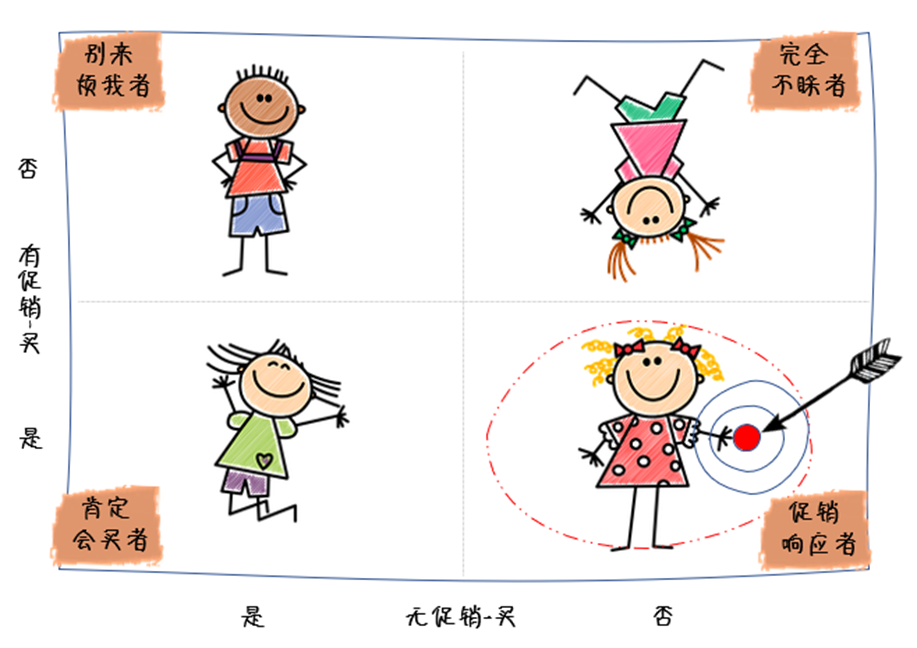

<center>增长模型示意</center>

**详细内容请参考拙作：《数据分析咖哥十话》** 人民邮电出版社2022年出版

In [1]:
import pandas as pd # 导入Pandas
import numpy as np # 导入NumPy
df_fission = pd.read_csv('裂变.csv') # 载入数据
print('用户数:', df_fission.count()['用户码']) # 查看数据条目数
df_fission.head() # 显示前几行数据

用户数: 64000


,用户码,曾助力,曾拼团,曾推荐,设备,城市类型,R值,M值,裂变类型,是否转化
0,1,0,1,0,电脑,中小,10,138.00,助力砍价,0
1,2,0,1,0,电脑,一线,4,105.59,拼团狂买,0
2,3,0,1,0,电脑,一线,1,494.13,拼团狂买,1
3,4,0,1,1,手机,二线,10,148.45,无裂变页面,0
4,5,1,0,0,手机,二线,2,337.18,拼团狂买,0


/home/huangjia/ENTER/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
/home/huangjia/ENTER/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/huangjia/ENTER/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 21147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/huangjia/ENTER/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 30733 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/huangjia/ENTER/lib/python3.9/site-packages/matplo

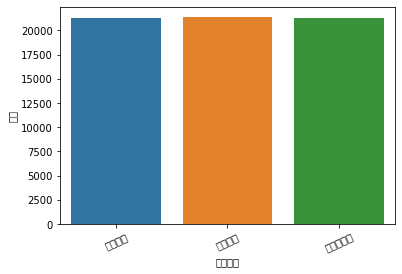

In [2]:
import matplotlib.pyplot as plt # 导入pyplot 模块
import seaborn as sns # 导入Seaborn

plt.rcParams["font.family"]=['SimHei'] #用来设定字体样式
plt.rcParams['font.sans-serif']=['SimHei'] #用来设定无衬线字体样式
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

fig = sns.countplot('裂变类型', data=df_fission) # 创建柱状计数图
fig.set_xticklabels(fig.get_xticklabels(),rotation=25) #x 轴标签倾斜
fig.set_ylabel("数目") #y 轴标题
plt.show() # 输出图像

<BarContainer object of 3 artists>

/home/huangjia/ENTER/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 19968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/huangjia/ENTER/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/huangjia/ENTER/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/huangjia/ENTER/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 23567 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/huangjia/ENTER/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/huangjia/ENTER/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: Runtim

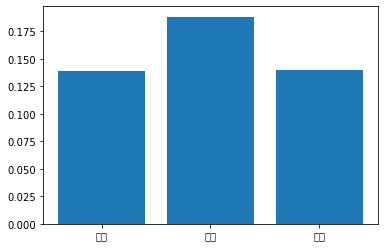

In [3]:
df_plot = df_fission.groupby('城市类型').是否转化.mean().reset_index() # 城市类型分组的转化率平均值
plt.bar(df_plot['城市类型'],df_plot['是否转化']) # 不同城市类型“是否转化”的平均值柱状图

<BarContainer object of 12 artists>

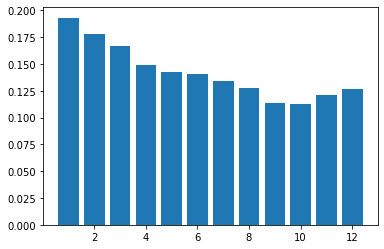

In [4]:
df_plot = df_fission.groupby('R值').是否转化.mean().reset_index() #R 值分组的转化率平均值
plt.bar(df_plot['R值'],df_plot['是否转化']) # 不同R 值“是否转化”的平均值柱状图

<BarContainer object of 3 artists>

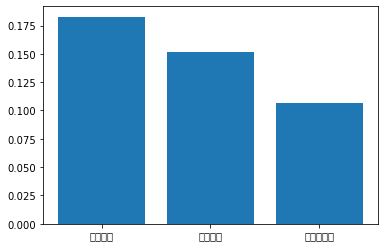

In [5]:
df_plot = df_fission.groupby('裂变类型').是否转化.mean().reset_index() # 促销分组的转化率平均值
plt.bar(df_plot['裂变类型'],df_plot['是否转化']) # 不同促销“是否转化”的平均值柱状图

In [6]:
# 计算每一种裂变带来的转化率增量
def increase_number(df, fission_type):
    # 计算裂变前后购买率的平均值
    before_conv = df[df.裂变类型 == '无裂变页面']['是否转化'].mean()
    after_conv = df[df.裂变类型 == fission_type]['是否转化'].mean()
    # 计算裂变前后购买率的差异（增量）
    conv_increase = after_conv - before_conv
    # 根据购买率的增量计算订单的增量
    order_increase = conv_increase * len(df[df.裂变类型 == fission_type]['是否转化'])
    # 输出增量的计算结果
    print('实际订单增量: {0}'.format(np.round(order_increase,2)))
    print('订单增长比例: {0}%'.format(np.round(conv_increase*100,2)))

In [7]:
increase_number(df_fission,'助力砍价')
increase_number(df_fission,'拼团狂买')

实际订单增量: 1631.89
订单增长比例: 7.66%
实际订单增量: 967.4
订单增长比例: 4.52%


In [8]:
df_fission.groupby(['曾助力','曾拼团','裂变类型']).agg({'是否转化':'mean'}) # 按用户曾用过的促销方式分组显示“是否转化”的平均值

是否转化
曾助力 曾拼团 裂变类型           
0   1   助力砍价   0.166388
        拼团狂买   0.169794
        无裂变页面  0.095808
1   0   助力砍价   0.168968
        拼团狂买   0.110892
        无裂变页面  0.099813
    1   助力砍价   0.314993
        拼团狂买   0.251653
        无裂变页面  0.180549

In [9]:
df_dummies = df_fission.drop(['裂变类型'],axis=1) # 在拆分哑变量前，先移除“裂变类型”
df_dummies = pd.get_dummies(df_dummies) # 为分类变量拆分哑变量
df_dummies['裂变类型'] = df_fission['裂变类型'] # 把“裂变类型”重新加入
df_fission = df_dummies.copy() # 把哑变量数据集复制给元数据集
df_fission.head() # 输出数据

,用户码,曾助力,曾拼团,曾推荐,R值,M值,是否转化,设备_其它,设备_手机,设备_电脑,城市类型_一线,城市类型_中小,城市类型_二线,裂变类型
0,1,0,1,0,10,138.00,0,0,0,1,0,1,0,助力砍价
1,2,0,1,0,4,105.59,0,0,0,1,1,0,0,拼团狂买
2,3,0,1,0,1,494.13,1,0,0,1,1,0,0,拼团狂买
3,4,0,1,1,10,148.45,0,0,1,0,0,0,1,无裂变页面
4,5,1,0,0,2,337.18,0,0,1,0,0,0,1,拼团狂买


In [10]:
df_discount = df_fission.query("裂变类型 == '助力砍价' | 裂变类型 == '无裂变页面'")
df_discount['用户码'].count()

42613

In [11]:
df_groupby = df_fission.query("裂变类型 == '拼团狂买' | 裂变类型 == '无裂变页面'")
df_groupby['用户码'].count()

42693

In [12]:
df_discount.loc[(df_discount.裂变类型 == '助力砍价') & (df_discount.是否转化 == 1), '标签'] = 0 #裂变购买者TR（促销有应答）
df_discount.loc[(df_discount.裂变类型 == '助力砍价') & (df_discount.是否转化 == 0), '标签'] = 1 #裂变未购买者TN（促销无应答）
df_discount.loc[(df_discount.裂变类型 == '无裂变页面') & (df_discount.是否转化 == 1), '标签'] = 2 # 无裂变购买者CR （控制有应答）
df_discount.loc[(df_discount.裂变类型 == '无裂变页面') & (df_discount.是否转化 == 0), '标签'] = 3 # 无裂变未购买者CN（控制无应答）
df_discount.head()

/home/huangjia/ENTER/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/home/huangjia/ENTER/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,用户码,曾助力,曾拼团,曾推荐,R值,M值,是否转化,设备_其它,设备_手机,设备_电脑,城市类型_一线,城市类型_中小,城市类型_二线,裂变类型,标签
0,1,0,1,0,10,138.00,0,0,0,1,0,1,0,助力砍价,1.0
3,4,0,1,1,10,148.45,0,0,1,0,0,0,1,无裂变页面,3.0
5,6,0,1,1,10,56.48,0,0,0,1,0,0,1,助力砍价,1.0
6,7,1,1,1,2,551.98,0,1,0,0,1,0,0,助力砍价,1.0
8,9,1,0,1,7,29.99,1,0,0,1,0,0,1,助力砍价,0.0


In [13]:
X = df_discount.drop(['标签','是否转化'],axis=1) # 特征集，移除标签相关字段
y = df_discount.标签 # 标签集

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [15]:
# pip install xgboost

     |████████████████████████████████| 192.9 MB 299 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [16]:
import xgboost as xgb # 导入XGboost 模型
xgb_model = xgb.XGBClassifier() # 创建XGboost 模型

In [17]:
xgb_model.fit(X_train.drop(['用户码','裂变类型'], axis=1), y_train) # 拟合模型

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [18]:
uplift_probs = xgb_model.predict_proba(X_test.drop(['用户码','裂变类型'], axis=1)) # 预测测试集用户的分类概率
uplift_probs # 输出4 种概率

array([[0.05779624, 0.42779416, 0.04329965, 0.47111   ],
       [0.05857937, 0.42858303, 0.05535498, 0.45748267],
       [0.06708433, 0.4965799 , 0.06728459, 0.36905122],
       ...,
       [0.06496314, 0.44792292, 0.0228678 , 0.46424612],
       [0.0789047 , 0.4244552 , 0.05198535, 0.44465476],
       [0.04501517, 0.48013481, 0.02245697, 0.45239305]], dtype=float32)

In [19]:
discount_uplift = X_test.copy() #构建增量分数数据集   
discount_uplift['P_TR'] = uplift_probs[:,0] #添加有应答裂变概率
discount_uplift['P_TN'] = uplift_probs[:,1] #添加无应答裂变概率
discount_uplift['P_CR'] = uplift_probs[:,2] #添加有应答控制概率
discount_uplift['P_CN'] = uplift_probs[:,3] #添加无应答控制概率
#计算增量分数
discount_uplift['增量分数'] = discount_uplift.eval('P_TR/(P_TN+P_TR) + P_CN/(P_CN+P_CR) - P_TN/(P_TN+P_TR) - P_CR/(P_CN+P_CR)') 
discount_uplift

,用户码,曾助力,曾拼团,曾推荐,R值,M值,设备_其它,设备_手机,设备_电脑,城市类型_一线,城市类型_中小,城市类型_二线,裂变类型,P_TR,P_TN,P_CR,P_CN,增量分数
15868,15869,0,1,1,1,333.39,0,1,0,1,0,0,助力砍价,0.057796,0.427794,0.043300,0.471110,0.069698
33225,33226,1,0,0,7,29.99,0,1,0,0,0,1,助力砍价,0.058579,0.428583,0.055355,0.457483,0.024615
30309,30310,0,1,1,3,93.94,0,0,1,0,0,1,助力砍价,0.067084,0.496580,0.067285,0.369051,-0.070378
43369,43370,0,1,1,5,29.99,0,1,0,0,0,1,助力砍价,0.047551,0.449388,0.022954,0.480107,0.100120
52540,52541,1,0,0,3,242.33,1,0,0,0,0,1,助力砍价,0.113181,0.412035,0.043588,0.431196,0.247379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51156,51157,0,1,0,3,136.39,0,1,0,1,0,0,助力砍价,0.089818,0.480142,0.043055,0.386985,0.114933
31954,31955,0,1,0,8,207.98,0,0,1,0,0,1,助力砍价,0.058342,0.375758,0.053327,0.512573,0.080330
29883,29884,0,1,1,5,97.32,0,0,1,0,0,1,无裂变页面,0.064963,0.447923,0.022868,0.464246,0.159433
62541,62542,0,1,0,7,159.18,0,0,1,0,1,0,助力砍价,0.078905,0.424455,0.051985,0.444655,0.104164


In [20]:
print('助力砍价的增量分数:', discount_uplift.增量分数.mean())
# print('拼团狂买的增量分数:', groupbuy_uplift.增量分数.mean())

助力砍价的增量分数: 0.14473694562911987


In [21]:
# Functions to build the Uplift model and visualize the QINI Curve
def qini_rank(uplift:pd.DataFrame):
    """Rank the data by the uplift score
    """
    # Creat new dataframe
    ranked = pd.DataFrame({'n':[], '标签':[]})
    ranked['标签'] = uplift['标签']
    ranked['增量分数'] = uplift['增量分数']
    
    
    # Add proportion
    ranked['n'] = ranked.增量分数.rank(pct=True, ascending=False)
    # Data Ranking   
    ranked = ranked.sort_values(by='n').reset_index(drop=True)
    print(ranked)
    return ranked


def qini_eval(ranked:pd.DataFrame):
    """Evaluate the uplift value with the QINI criterion
    """
    uplift_model, random_model = ranked.copy(), ranked.copy()
    # Using Treatment and Control Group to calculate the uplift (Incremental gain)
    C, T = sum(ranked['标签'] <= 1), sum(ranked['标签'] >= 2)
    ranked['cr'] = 0
    ranked['tr'] = 0
    ranked.loc[ranked.标签 == 2,'cr'] = 1
    ranked.loc[ranked.标签 == 0,'tr'] = 1
    ranked['cr/c'] = ranked.cr.cumsum() / C
    ranked['tr/t'] = ranked.tr.cumsum() / T
    # Calculate and put the uplift and random value into dataframe
    uplift_model['uplift'] = round(ranked['tr/t'] - ranked['cr/c'],5)
    random_model['uplift'] = round(ranked['n'] * uplift_model['uplift'].iloc[-1],5)
    
    
    # Add q0
    q0 = pd.DataFrame({'n':0, 'uplift':0, '标签': None}, index =[0])
    uplift_model = pd.concat([q0, uplift_model]).reset_index(drop = True)
    random_model = pd.concat([q0, random_model]).reset_index(drop = True)  
    # Add model name & concat
    uplift_model['model'] = 'Uplift model'
    random_model['model'] = 'Cumulative Uplift Score'
    merged = pd.concat([uplift_model, random_model]).sort_values(by='n').reset_index(drop = True)
    return merged


def qini_plot(merged:pd.DataFrame):
    """Plot the QINI
    """
    # plot the data
    ax = sns.lineplot(x='n', y='uplift', hue='model', data=merged,
                      style='model', palette=['red','grey'])
    
    
    # Plot settings
    sns.set_style('ticks')
    handles, labels = ax.get_legend_handles_labels()
    plt.xlabel('Users Proportion',fontsize=15)
    plt.ylabel('Uplift',fontsize=15)
    plt.subplots_adjust(right=1)
    plt.subplots_adjust(top=1)
    plt.legend(fontsize=5)
    ax.tick_params(labelsize=5)
    ax.legend(handles=handles[1:], labels=labels[1:], loc='upper right')
    return ax


def qini(uplift:pd.DataFrame):
    """Combine all functions
    """
    ranked = qini_rank(uplift)
    merged = qini_eval(ranked)
    ax = qini_plot(merged)
    return ax

             n   标签      增量分数
0     0.000117  3.0  1.306695
1     0.000235  1.0  1.289060
2     0.000352  3.0  1.268494
3     0.000469  3.0  1.224401
4     0.000587  3.0  1.210912
...        ...  ...       ...
8518  0.999531  2.0 -1.284537
8519  0.999648  3.0 -1.358848
8520  0.999765  3.0 -1.486941
8521  0.999883  3.0 -1.540938
8522  1.000000  2.0 -1.586921

[8523 rows x 3 columns]


Text(0.5, 1.0, 'Qini Curve - Group By')

findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.


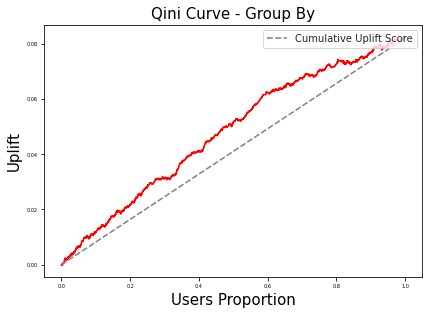

In [22]:
discount_uplift['标签'] = y_test #放回分类值
qini(discount_uplift) # 助力砍价Qini曲线
plt.title('Qini Curve - Group By',fontsize=15)

**就到这里！下面请大家自行计算并绘制拼团狂买的Qini曲线**

增长建模的核心是选出最有可能做出响应或改变的用户作为目标用户。我们需要忽略掉那些无论如何也不会购买产品的用户，也要忽略掉那些无论如何都会购买我们的产品的用户。我们要努力把有限的资源应用到那些“墙头草”用户上。这样才算把有限的营销资源用到位，将我们的投资回报最大化。

简而言之，这个案例就是围绕增长模型，设计了一个预测用户是否会对某种测试进行应答的多分类问题，并利用scikit-learn 的XGBoost 分类模型中的XGBClassifier() 来解决这个问题。如果不采用XGBoost 模型而是选择其他机器学习方法进行多分类建模，也是完全可以的。在上面这个案例中，我们对两种裂变方式的效果进行了比较，如果有更多的选择，也完全可以按照同样的思路进行比较。

在实际工作中增长模型更复杂。有一些优惠方式在特定的用户细分群体中表现较好，因此需要为该细分群体创建特定的促销类型。此外，转化率的提升也不一定是成功的唯一标准，我们曾经多次强调还需要权衡成本。

记住，好的裂变方案能够在投入较少成本的情况下，让老用户瞬间变身为“推销员”，从而为产品带来极快的增速和成长。